Successfully loaded Netflix Dataset.csv. Total records: 7789

--- Result 1: Movies vs. TV Shows Distribution Over Time ---
Content Distribution Data Head:


Category,Movie,TV Show
Release_Year,,
2017,864,337
2018,1255,406
2019,1498,639
2020,1313,696
2021,88,29


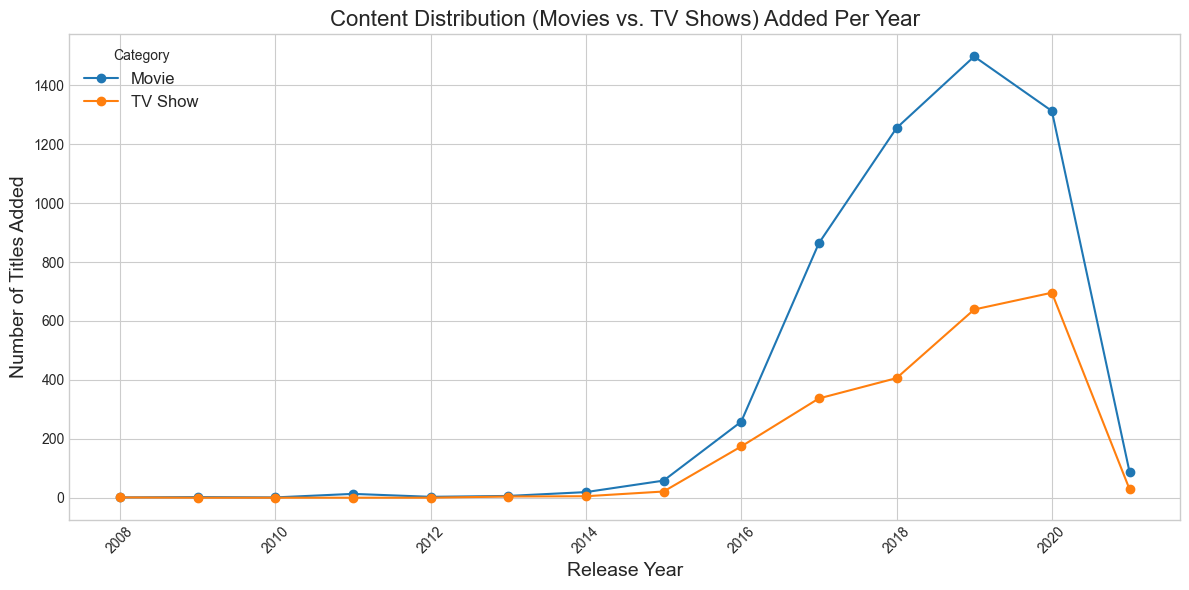


--- Result 2: Popularity of Top 5 Genres Over Time ---
Top 5 most common genres: ['International Movies', 'Dramas', 'Comedies', 'International TV Shows', 'Documentaries']

Top 5 Genre Popularity Data Head:


Type,Comedies,Documentaries,Dramas,International Movies,International TV Shows
Release_Year,,,,,
2017,191,206,297,418,198
2018,301,170,534,677,218
2019,452,189,597,641,355
2020,425,120,548,578,306
2021,37,9,38,24,6


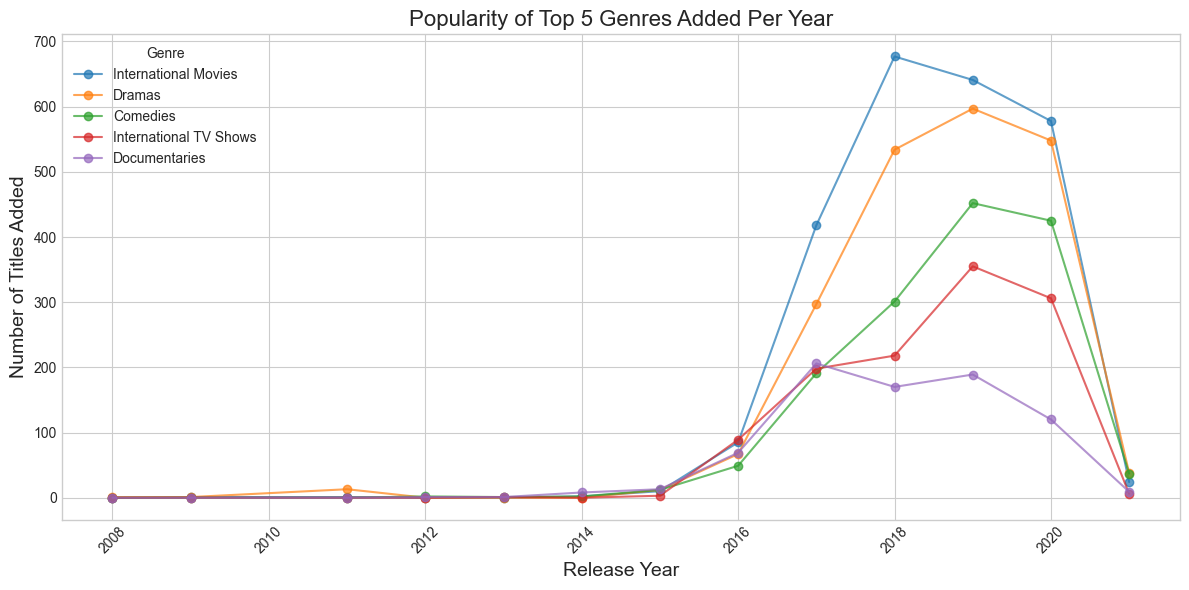


--- Result 3: Top 10 Country Contributions ---
Top 10 Country Contributions:


C:\Users\91912\AppData\Local\Temp\ipykernel_26988\1566215558.py:97: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_country['Country'].fillna('Unknown', inplace=True)


Country
United States     3297
India              990
United Kingdom     722
Canada             412
France             349
Japan              287
Spain              215
South Korea        212
Germany            199
Mexico             154
Name: count, dtype: int64

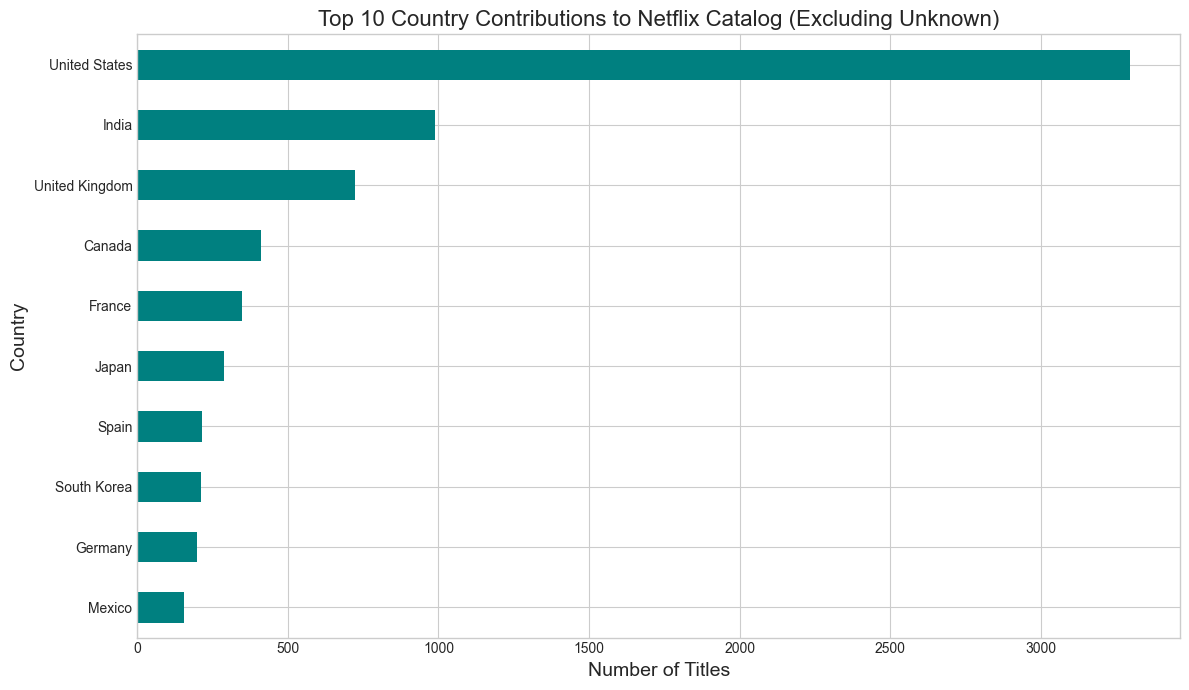

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Set plotting style for better visualization
plt.style.use('seaborn-v0_8-whitegrid')

#Data Loading and Preparation
FILE_NAME = "Netflix Dataset.csv"
try:
    df = pd.read_csv(FILE_NAME)
    print(f"Successfully loaded {FILE_NAME}. Total records: {len(df)}")
except FileNotFoundError:
    print(f"Error: The file '{FILE_NAME}' was not found. Please ensure it is in the same directory as the notebook.")
    exit()

# Prepare for Time-Series Analysis (Objectives 1 & 2)
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Release_Year'] = df['Release_Date'].dt.year

# Drop records where 'Release_Date' is missing, as we need the year for time-series analysis
df_time_series = df.dropna(subset=['Release_Year']).copy()
df_time_series['Release_Year'] = df_time_series['Release_Year'].astype(int)

#2. Objective 1: Distribution of Movies vs. TV Shows over the years ---
print("\n--- Result 1: Movies vs. TV Shows Distribution Over Time ---")

# Group by year and category and count the entries
content_distribution = df_time_series.groupby(['Release_Year', 'Category']).size().unstack(fill_value=0)

# Display the head of the resulting data
print("Content Distribution Data Head:")
display(content_distribution.tail())

# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(content_distribution.index, content_distribution['Movie'], label='Movie', marker='o')
plt.plot(content_distribution.index, content_distribution['TV Show'], label='TV Show', marker='o')

plt.title('Content Distribution (Movies vs. TV Shows) Added Per Year', fontsize=16)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Number of Titles Added', fontsize=14)
plt.legend(title='Category', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- 3. Objective 2: Popularity of Top Genres over the years ---
print("\n--- Result 2: Popularity of Top 5 Genres Over Time ---")

# Split 'Type' (genres) and explode the DataFrame
df_genres_exploded = df_time_series.copy()
df_genres_exploded['Type'] = df_genres_exploded['Type'].str.split(', ')
df_genres_exploded = df_genres_exploded.explode('Type')

# Calculate the total count for all genres
genre_counts = df_genres_exploded['Type'].value_counts()

# Identify the top 5 most common genres
top_5_genres = genre_counts.head(5).index.tolist()
print(f"Top 5 most common genres: {top_5_genres}")

# Filter for the top 5 and group by year
df_top_genres = df_genres_exploded[df_genres_exploded['Type'].isin(top_5_genres)]
genre_popularity_over_time = df_top_genres.groupby(['Release_Year', 'Type']).size().unstack(fill_value=0)

# Display the head of the resulting data
print("\nTop 5 Genre Popularity Data Head:")
display(genre_popularity_over_time.tail())

# Plotting the time series for top 5 genres
plt.figure(figsize=(12, 6))

for genre in top_5_genres:
    plt.plot(
        genre_popularity_over_time.index,
        genre_popularity_over_time[genre],
        label=genre,
        marker='o',
        alpha=0.7
    )

plt.title('Popularity of Top 5 Genres Added Per Year', fontsize=16)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Number of Titles Added', fontsize=14)
plt.legend(title='Genre', fontsize=10, loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- 4. Objective 3: Compare country-wise contributions ---
print("\n--- Result 3: Top 10 Country Contributions ---")

# Use the original DataFrame for country analysis (Country is independent of Release_Date)
df_country = df.copy()

# Fill missing 'Country' values to see if 'Unknown' is a major category, but we exclude it later.
df_country['Country'].fillna('Unknown', inplace=True)

# Split 'Country' and explode the DataFrame (handling co-productions)
df_country['Country'] = df_country['Country'].str.split(', ')
df_country_exploded = df_country.explode('Country')

# Count the occurrences of each country
country_counts = df_country_exploded['Country'].value_counts()

# Exclude 'Unknown' and get the top 10
if 'Unknown' in country_counts.index:
    country_counts = country_counts.drop('Unknown')

top_10_countries = country_counts.head(10)

# Display the top 10 countries data
print("Top 10 Country Contributions:")
display(top_10_countries)

# Generate a bar plot for the top 10 (sorted for better visualization)
plt.figure(figsize=(12, 7))
top_10_countries.sort_values(ascending=True).plot(kind='barh', color='teal')

plt.title('Top 10 Country Contributions to Netflix Catalog (Excluding Unknown)', fontsize=16)
plt.xlabel('Number of Titles', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.tight_layout()
plt.show()